In [2]:
! pip install kaggle


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d iamprateek/store-transaction-data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/store-transaction-data.zip'

with ZipFile(dataset, 'r')as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ideal_data = pd.read_csv("Hackathon_Ideal_Data.csv")
working_data = pd.read_csv("Hackathon_Working_Data.csv")

In [ ]:
target_variable = 'VALUE'


In [ ]:
X_train = ideal_data.drop(columns=[target_variable])
y_train = ideal_data[target_variable]

In [ ]:
X_test = working_data.drop(columns=[target_variable])

In [ ]:
X_train_encoded = pd.get_dummies(X_train, columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])

In [ ]:
min_samples = min(len(X_train_encoded), len(y_train))
X_train_encoded = X_train_encoded[:min_samples]
y_train = y_train[:min_samples]

In [ ]:
X_train_encoded, X_val_encoded, y_train, y_val = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)

In [ ]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [ ]:
X_val_encoded = pd.get_dummies(X_val, columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_val_scaled = scaler.transform(X_val_encoded)


In [ ]:
min_samples = min(len(y_val), len(y_pred))
y_val = y_val[:min_samples]
y_pred = y_pred[:min_samples]

In [ ]:
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.6166989818372804e+33


In [ ]:
X_test_encoded = pd.get_dummies(X_test, columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
working_data[target_variable] = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
working_data.to_csv("Updated_Hackathon_Working_Data.csv", index=False)

In [ ]:
validation_data = pd.read_csv("Hackathon_Validation_Data.csv")

In [ ]:
print(validation_data.head())

        ID STORECODE MONTH                       GRP
0  1112535        N1    M1       AFTER SHAVE LOTIONS
1  1112539        N1    M1    AGARBATTI & DHOOPBATTI
2  1112543        N1    M1  ALL AIR FRESHNERS(01/03)
3  1112547        N1    M1          ALL IODISED SALT
4  1112551        N1    M1                  ANTACIDS


In [ ]:
features = ['ID', 'STORECODE', 'MONTH', 'GRP']
X_validation = validation_data[features]

In [ ]:
X_validation_encoded = pd.get_dummies(X_validation, columns=['STORECODE', 'MONTH', 'GRP'])

In [ ]:
X_validation_encoded = X_validation_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [ ]:
X_validation_scaled = scaler.transform(X_validation_encoded)

In [ ]:
predicted_totalvalue = model.predict(X_validation_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


alidation_encoded = pd.get_dummies(validation_data[features], columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])

In [ ]:
submission_df = pd.DataFrame({
    'ID': validation_data['ID'],
    'TOTALVALUE': range(len(predicted_totalvalue))
})

In [ ]:
submission_df.index = range(len(submission_df))

In [ ]:
smallest_id = submission_df.head(9)

In [ ]:
print(smallest_id)

        ID  TOTALVALUE
0  1112535           0
1  1112539           1
2  1112543           2
3  1112547           3
4  1112551           4
5  1112555           5
6  1112559           6
7  1112563           7
8  1112567           8


In [ ]:
smallest_id.to_csv('submission.csv', index=False)

In [ ]:
print(ideal_data.describe())

                QTY         VALUE
count  14260.000000  14260.000000
mean      16.354488    294.455330
std       34.365583    760.129558
min        0.000000      0.000000
25%        1.000000     10.000000
50%        4.000000     99.000000
75%       16.000000    283.000000
max      641.000000  24185.000000


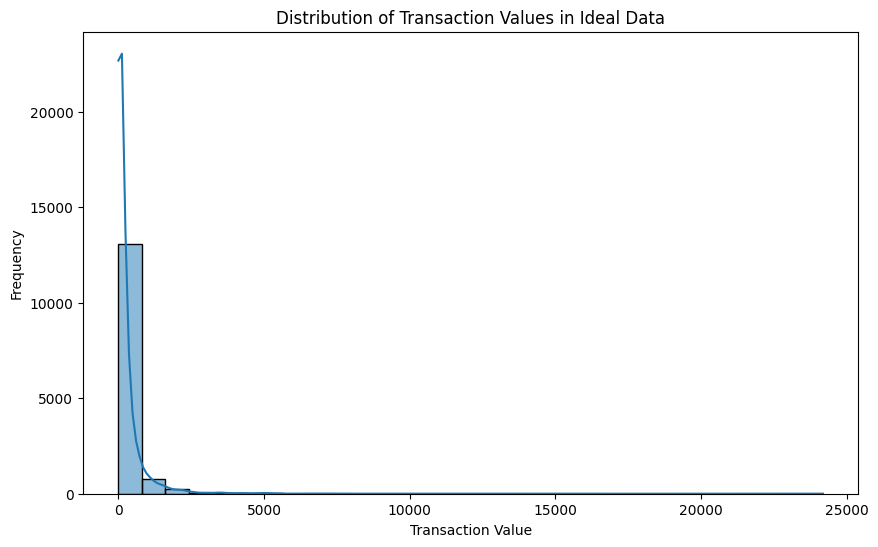

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ideal_data['VALUE'], bins=30, kde=True)
plt.title('Distribution of Transaction Values in Ideal Data')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()



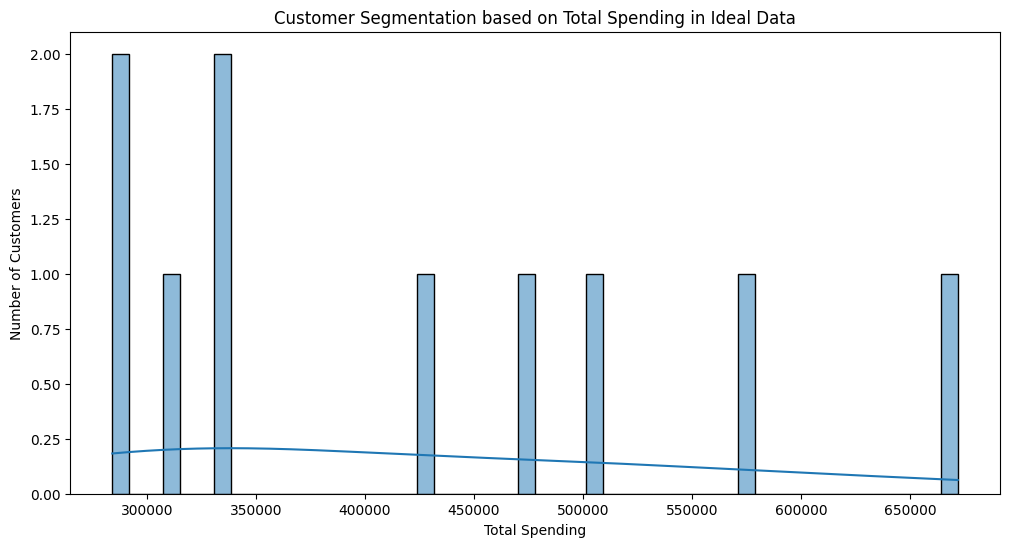

In [ ]:
customer_segments = ideal_data.groupby('STORECODE')['VALUE'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.histplot(customer_segments['VALUE'], bins=50, kde=True)
plt.title('Customer Segmentation based on Total Spending in Ideal Data')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

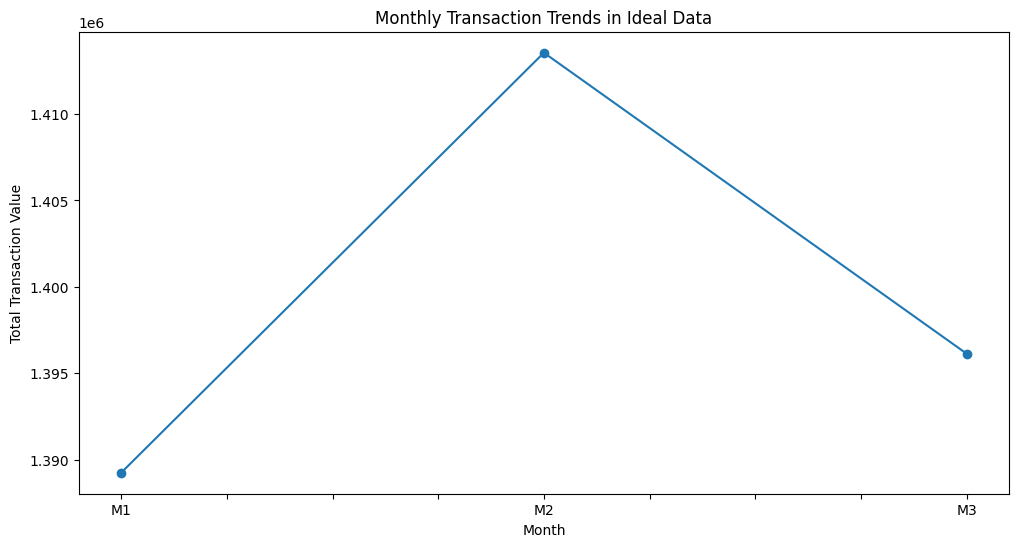

In [ ]:
monthly_trends = ideal_data.groupby('MONTH')['VALUE'].sum()

plt.figure(figsize=(12, 6))
monthly_trends.plot(marker='o')
plt.title('Monthly Transaction Trends in Ideal Data')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.show()

<ipython-input-282-d5e1f0712759>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ideal_data.corr()


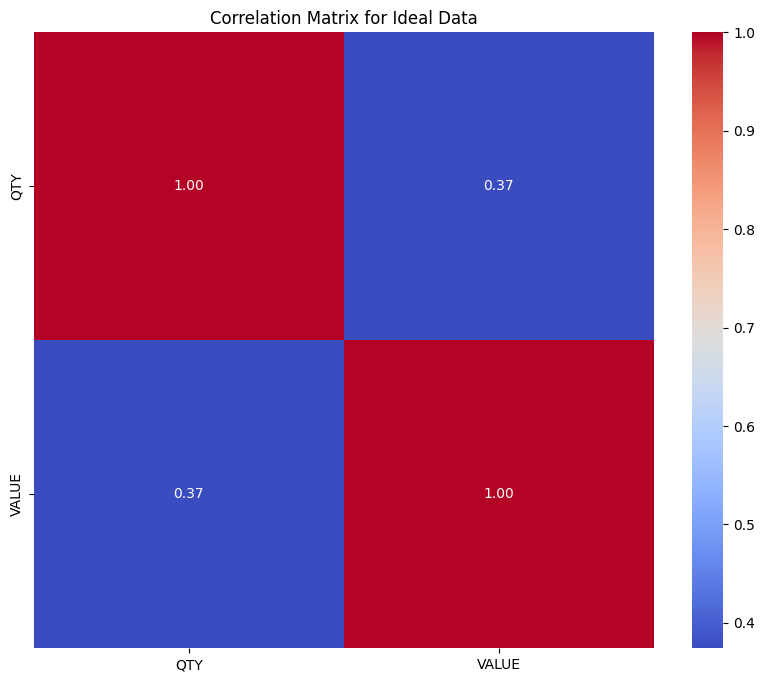

In [ ]:
correlation_matrix = ideal_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Ideal Data')
plt.show()